## Analise sobre o custo médico para curar doenças causadas pelo tabagismo

Este conjunto de dados fornece uma visão sobre vários fatores associados ao custo médico para curar doenças causadas pelo tabagismo.

Colunas no dataset:

- **age**: idade do beneficiário principal

- **sex**: gênero do contratante de seguros - masculino = 0, feminino = 1

- **bmi**: índice de massa corporal, fornecendo uma compreensão do corpo, pesos relativamente altos ou baixos em relação à altura e idealmente entre 18,5 a 24,9

- **children**: número de filhos cobertos por seguro saúde / Número de dependentes

- **smoker**: se a pessoa fuma ou não - não = 0, sim = 1

- **region**: a área residencial do beneficiário nos EUA - southwest = 0, southeast = 1, northwest = 2, northeast = 3

- **medical charges**: custos médicos individuais cobrados pelo seguro de saúde

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [37]:
db = pd.read_csv('dataset_.csv')

In [38]:
#verificando informações
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              1338 non-null   int64  
 1   sex              1338 non-null   object 
 2   bmi              1338 non-null   float64
 3   children         1338 non-null   int64  
 4   smoker           1338 non-null   object 
 5   region           1338 non-null   object 
 6   medical charges  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [39]:
db.head(10)

,age,sex,bmi,children,smoker,region,medical charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [40]:
db.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
medical charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [41]:
db.isnull().sum()

age                0
sex                0
bmi                0
children           0
smoker             0
region             0
medical charges    0
dtype: int64

In [42]:
#número total de linhas duplicadas
db.duplicated().sum()

np.int64(1)

In [43]:
#valores únicos em cada coluna
db.nunique()

age                  47
sex                   2
bmi                 548
children              6
smoker                2
region                4
medical charges    1337
dtype: int64

In [44]:
db['smoker'] = db['smoker'].map({'yes': 1, 'no': 0})
db['region'] = db['region'].map({'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3})
db['sex'] = db['sex'].map({'male': 0, 'female': 1})

In [46]:
numerical_data = db.select_dtypes(include=['number'])
corr_matrix = numerical_data.corr()

corr_matrix

,age,sex,bmi,children,smoker,region,medical charges
age,1.000000,0.020856,0.109272,0.042469,-0.025019,-0.002127,0.299008
sex,0.020856,1.000000,-0.046371,-0.017163,-0.076185,0.004588,-0.057292
bmi,0.109272,-0.046371,1.000000,0.012759,0.003750,-0.157566,0.198341
children,0.042469,-0.017163,0.012759,1.000000,0.007673,-0.016569,0.067998
smoker,-0.025019,-0.076185,0.003750,0.007673,1.000000,0.002181,0.787251
region,-0.002127,0.004588,-0.157566,-0.016569,0.002181,1.000000,0.006208
medical charges,0.299008,-0.057292,0.198341,0.067998,0.787251,0.006208,1.000000


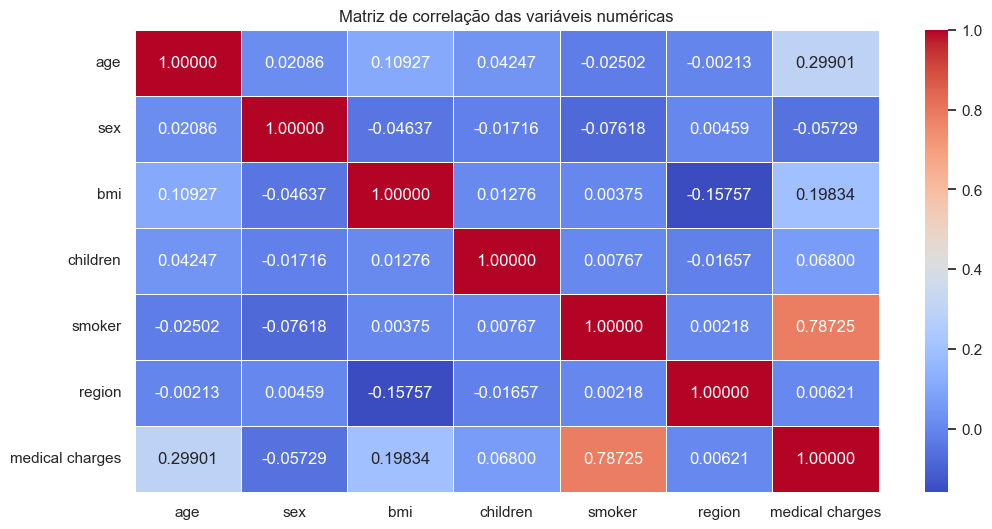

In [47]:
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.5f', linewidths=0.5)
plt.title('Matriz de correlação das variáveis numéricas')
plt.show()

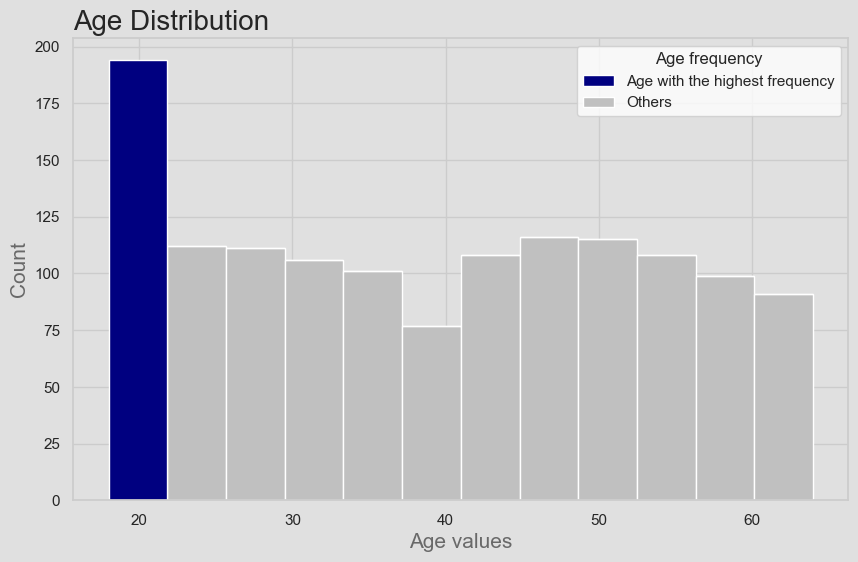

In [48]:
db['Age frequency'] = db['age'].apply(
    lambda x: 'Age with the highest frequency' if 18.0 <= x <= 21.0 else 'Others'
)

palette = {
    'Age with the highest frequency': '#000080',
    'Others': '#C0C0C0'
}

sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))

sns.histplot(
    data=db,
    x='age',
    hue='Age frequency',
    multiple='stack',
    palette=palette,
    alpha=1,  
    kde=False  # Linha de densidade
)

plt.title('Age Distribution', fontsize=20, loc='left')
plt.xlabel('Age values', fontsize=15, color='#696969')
plt.ylabel('Count', fontsize=15, color='#696969')

plt.gca().set_facecolor('#E0E0E0')
plt.gcf().set_facecolor('#E0E0E0')

plt.show()

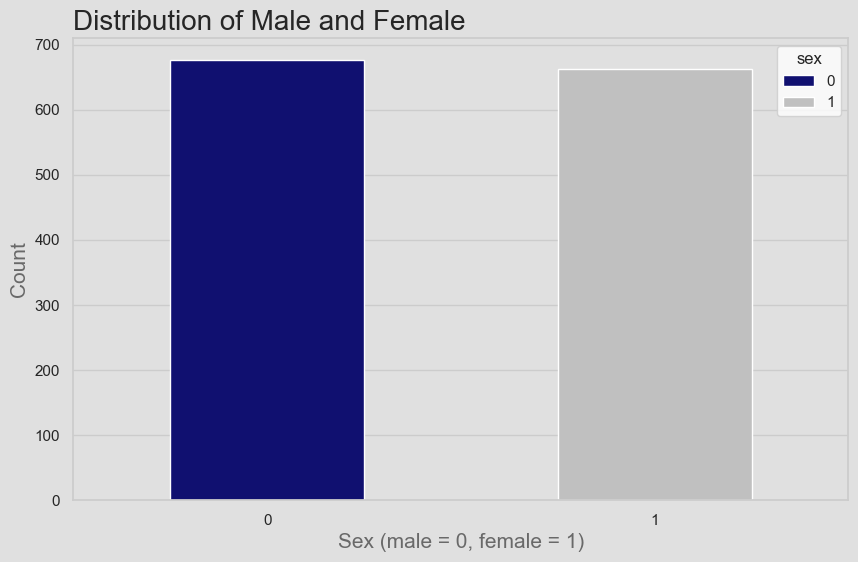

In [49]:
plt.figure(figsize=(10, 6))

count_plot = sns.countplot(
    x='sex', 
    data=db,
    hue='sex',
    palette=['#000080', '#C0C0C0'],
    width=0.5
)

plt.title('Distribution of Male and Female', fontsize=20, loc='left')
plt.xlabel('Sex (male = 0, female = 1)', fontsize=15, color='#696969')
plt.ylabel('Count', fontsize=15, color='#696969')

plt.gca().set_facecolor('#E0E0E0')
plt.gcf().set_facecolor('#E0E0E0') 

plt.show()

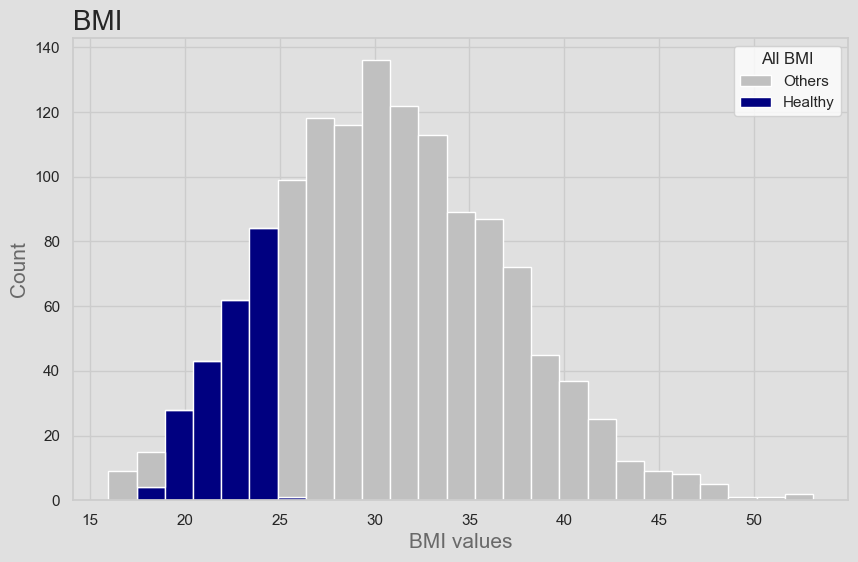

In [50]:
db['All BMI'] = db['bmi'].apply(
    lambda x: 'Healthy' if 18.5 <= x <= 24.9 else 'Others'
)

palette = {
    'Healthy': '#000080',
    'Others': '#C0C0C0'
}

sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))

sns.histplot(
    data=db,
    x='bmi',
    hue='All BMI',
    multiple='stack',
    palette=palette,
    alpha=1,  
    kde=False  # Linha de densidade
)

plt.title('BMI', fontsize=20, loc='left')
plt.xlabel('BMI values', fontsize=15, color='#696969')
plt.ylabel('Count', fontsize=15, color='#696969')

plt.gca().set_facecolor('#E0E0E0')
plt.gcf().set_facecolor('#E0E0E0')

plt.show()

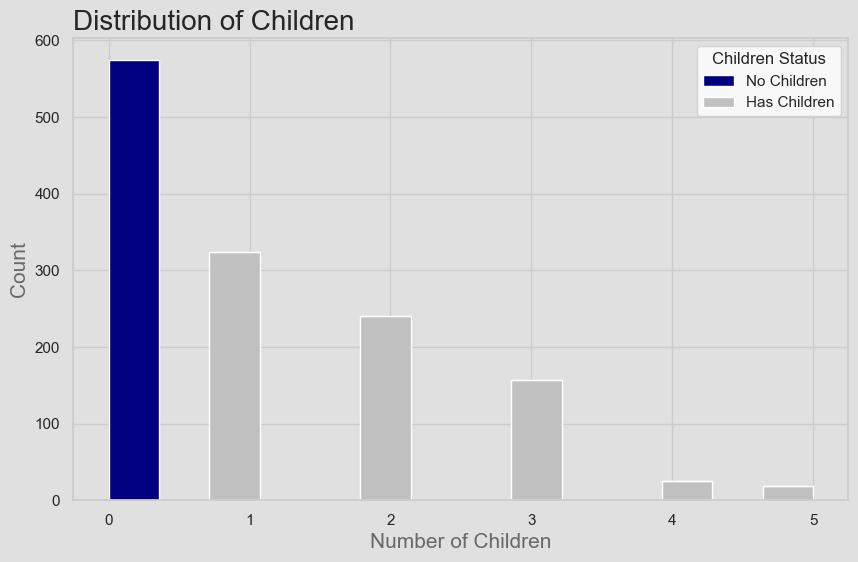

In [51]:
db['Children Status'] = db['children'].apply(
    lambda x: 'No Children' if x == 0 else 'Has Children'
)

sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))

sns.histplot(
    data=db,
    x='children',
    hue='Children Status',
    multiple='stack',
    palette={'No Children': '#000080', 'Has Children': '#C0C0C0'},
    alpha=1,  
)

plt.title('Distribution of Children', fontsize=20, loc='left')
plt.xlabel('Number of Children', fontsize=15, color='#696969')
plt.ylabel('Count', fontsize=15, color='#696969')

plt.gca().set_facecolor('#E0E0E0')
plt.gcf().set_facecolor('#E0E0E0')

plt.show()

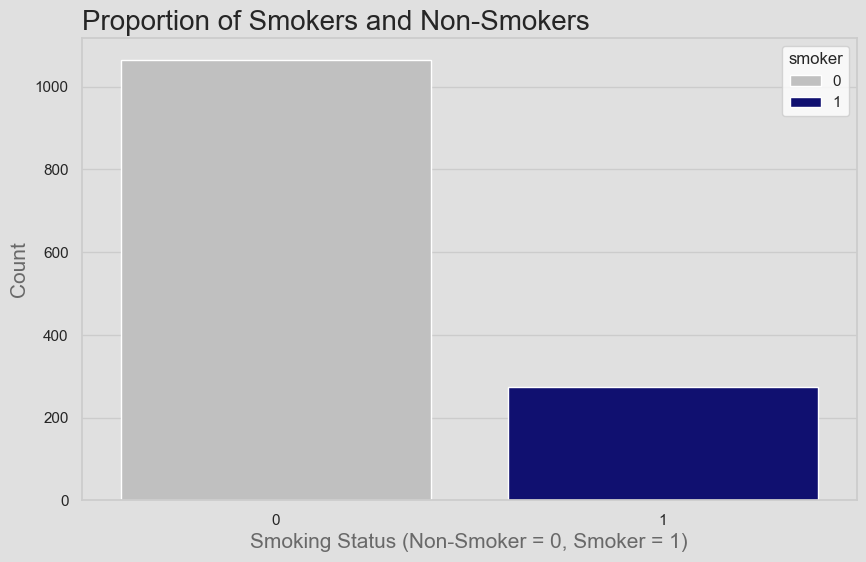

In [52]:
plt.figure(figsize=(10, 6))

count_plot = sns.countplot(
    x='smoker', 
    data=db,
    hue='smoker',
    palette=['#C0C0C0', '#000080'],
)

plt.title('Proportion of Smokers and Non-Smokers', fontsize=20, loc='left')
plt.xlabel('Smoking Status (Non-Smoker = 0, Smoker = 1)', fontsize=15, color='#696969')
plt.ylabel('Count', fontsize=15, color='#696969')


plt.gca().set_facecolor('#E0E0E0')
plt.gcf().set_facecolor('#E0E0E0') 

plt.show()

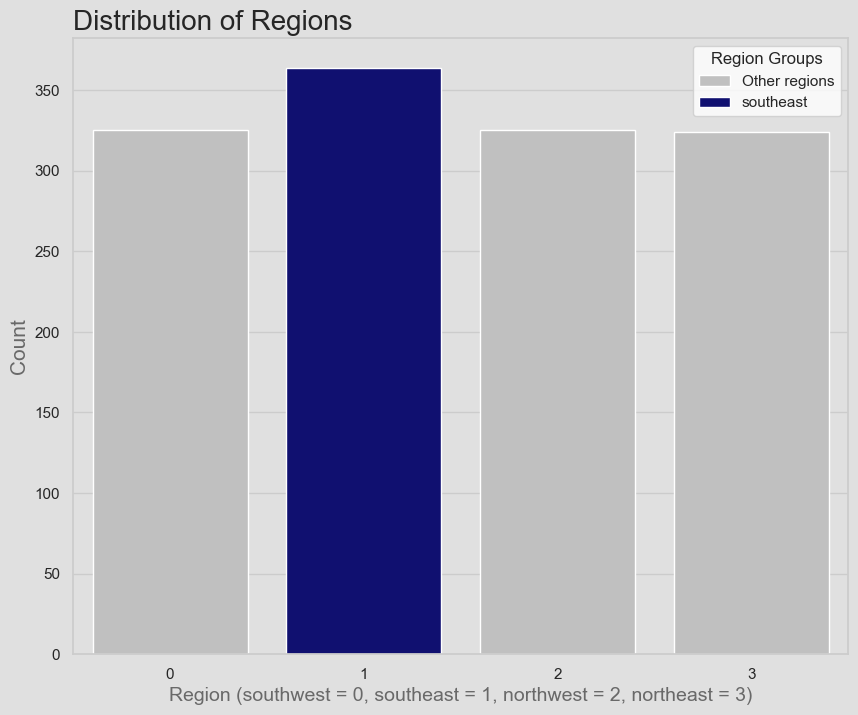

In [53]:
db['Region Groups'] = db['region'].apply(
    lambda x: 'southeast' if x == 1 else 'Other regions'
)

sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 8))

sns.countplot(
    data=db,
    x='region',
    hue='Region Groups',
    palette=['#C0C0C0', '#000080'],
    alpha=1,
)

plt.title('Distribution of Regions', fontsize=20, loc='left')
plt.xlabel('Region (southwest = 0, southeast = 1, northwest = 2, northeast = 3)', fontsize=14, color='#696969')
plt.ylabel('Count', fontsize=15, color='#696969')

plt.gca().set_facecolor('#E0E0E0')
plt.gcf().set_facecolor('#E0E0E0')

plt.show()

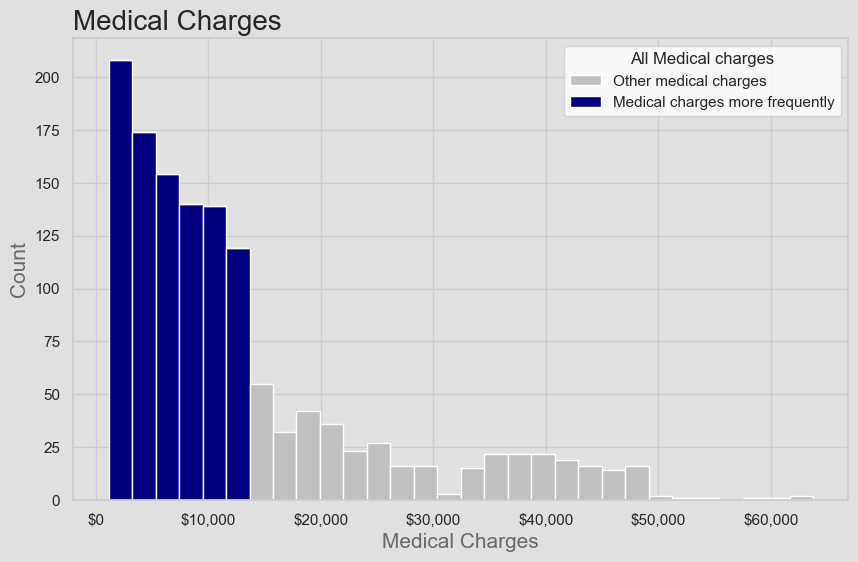

In [54]:
db['All Medical charges'] = db['medical charges'].apply(
    lambda x: 'Medical charges more frequently' if 1121.87 <= x <= 13700.0 else 'Other medical charges'
)

palette = {
    'Medical charges more frequently': '#000080',
    'Other medical charges': '#C0C0C0'
}

sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))

sns.histplot(
    data=db,
    x='medical charges',
    hue='All Medical charges',
    multiple='stack',
    palette=palette,
    alpha=1,  
    kde=False  # Linha de densidade
)

plt.title('Medical Charges', fontsize=20, loc='left')
plt.xlabel('Medical Charges', fontsize=15, color='#696969')
plt.ylabel('Count', fontsize=15, color='#696969')

plt.gca().set_facecolor('#E0E0E0')
plt.gcf().set_facecolor('#E0E0E0')

plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))

plt.show()

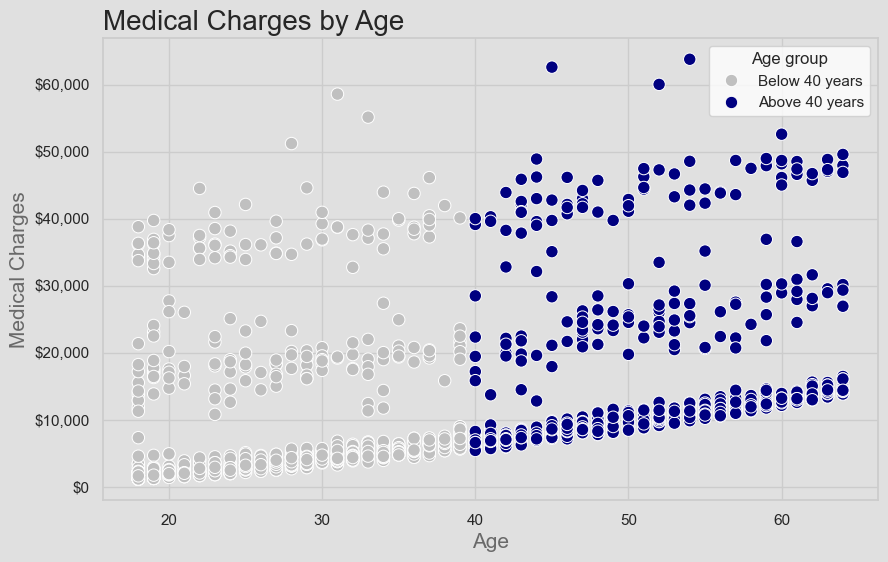

In [55]:
db['Age group'] = db['age'].apply(
    lambda x: 'Above 40 years' if x >= 40 else 'Below 40 years'
)

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=db, 
    x='age', 
    y='medical charges', 
    hue='Age group', 
    palette=['#C0C0C0', '#000080'],
    s=80
)


plt.title('Medical Charges by Age', fontsize=20, loc='left')
plt.xlabel('Age', fontsize=15, color='#696969')
plt.ylabel('Medical Charges', fontsize=15, color='#696969')

plt.gca().set_facecolor('#E0E0E0')
plt.gcf().set_facecolor('#E0E0E0')

plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))

plt.show()

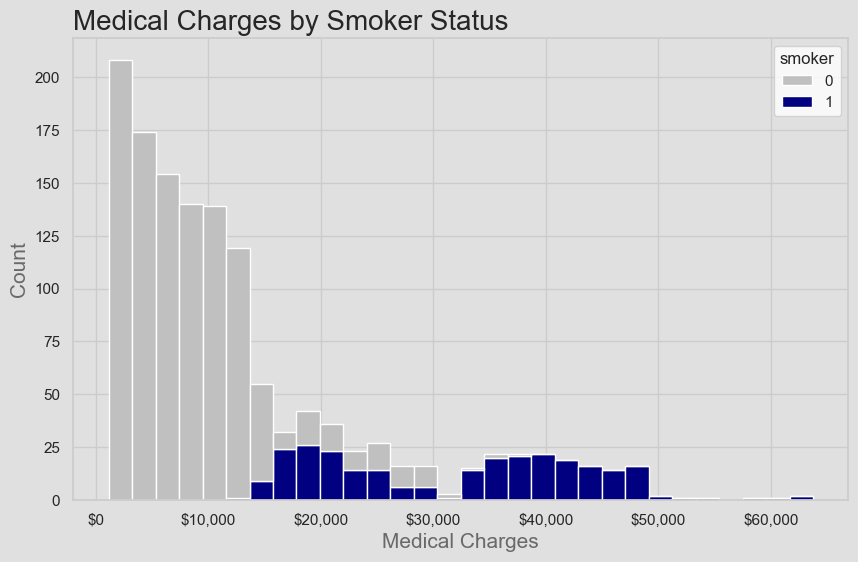

In [56]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))

sns.histplot(
    data=db,
    x='medical charges',
    hue='smoker',
    multiple='stack',
    palette=['#C0C0C0', '#000080'],
    alpha=1,  
    kde=False  #linha de densidade
)

plt.title('Medical Charges by Smoker Status', fontsize=20, loc='left')
plt.xlabel('Medical Charges', fontsize=15, color='#696969')
plt.ylabel('Count', fontsize=15, color='#696969')

plt.gca().set_facecolor('#E0E0E0')
plt.gcf().set_facecolor('#E0E0E0')

plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))

plt.show()

## Conclusão

**Correlação entre Variáveis**
Para verificar a correlação entre as variáveis, algumas que eram string foram transformadas em números inteiros.
- Idade e Gastos Médicos: Existe uma correlação positiva moderada, indicando que, em geral, à medida que a idade aumenta, os custos médicos também tendem a aumentar, embora a relação não seja extremamente forte.
- IMC (BMI) e Gastos Médicos: A correlação positiva fraca sugere que o índice de massa corporal tem um impacto leve nos custos médicos.
- Número de Filhos e Gastos Médicos: A correlação entre o número de filhos e os gastos médicos é muito fraca, indicando que o número de dependentes tem pouco impacto nos custos médicos.
- Fumante e Gastos Médicos: A correlação forte e positiva sugere que o status de fumante está fortemente associado a maiores despesas médicas, refletindo a influência significativa do tabagismo nos custos com saúde.
- Região e Gastos Médicos: Uma correlação muito fraca com os custos médicos, indicando que não é um fator significativo para explicar variações nos custos.
- Sexo e Gastos Médicos: Correlação muito fraca negativa, indicando pouca ou nenhuma relação direta entre os dois.

**Distribuição dos Dados**
- Faixa Etária: A amostra é diversificada em termos de idade, com uma média de aproximadamente 39 anos, e uma concentração maior em adultos jovens entre 18 e 21 anos.
- Sexo: A distribuição entre homens e mulheres é equilibrada, com uma ligeira predominância masculina.
- Fumantes: A maioria dos indivíduos são não fumantes, porém, os fumantes representam um grupo significativo com gastos médicos mais altos, refletindo a preocupação com os custos associados ao tabagismo.
- Regiões: A distribuição regional é bastante uniforme, com o sudeste dos EUA apresentando o maior número de registros.
- Número de Filhos: A maioria dos indivíduos não possui filhos, mas alguns têm até cinco, indicando variação no número de dependentes cobertos.
- IMC (BMI): A maioria dos indivíduos está fora da faixa considerada ideal para um estado de saúde adequado, com poucos dentro da faixa saudável.
- Gastos Médicos: Os gastos médicos variam amplamente, com a maioria dos casos situados entre 2.000 e 14.000 dólares, enquanto os extremos vão de 1.121,87 a 63.770,42 dólares.

No geral, os dados indicam que o tabagismo é um fator crítico associado a altos gastos médicos e a idade também tem certa notoriedade, embora menos siginificativa. A variação no IMC (BMI), o número de filhos, sexo e região têm impactos menores nos custos médicos.
